# UK Department for Transport Dataset

## This notebook is a Data Preprocessing and Exploratory Data Analysis on the UK Transport Dataset

## Table of Contents

1. Importing Libraries and Preparing Environment
2. Business Objective
3. Data Preparation
4. Feature Dataset Construction
5. Data Splitting
6. Descriptive Statistics
7. Data Cleaning
8. Statistical Analysis
9. Conclusion
10. Data Exporting

## 1.0 Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import warnings

import io

import time


"""
importing visualization modules

"""

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from scipy import stats
from scipy.stats import chi2_contingency

from scipy.stats import chisquare


import statsmodels.api as sm

import warnings

warnings.filterwarnings("ignore")

### Starting the Notebook Timer

In [2]:
Start_time = time.time()

def notebook_timer(xl):
    
    def wrapper (*args, **kwargs):
        
        start_time = time.time()
        
        result = fn(*args,**kwargs)
        
        end_time = time.time()
        
        time_taken = round(end_time - start_time, 4)
        
        if time_taken < 60:
            
            print(f'{fn.__name__} took {time_taken} seconds to run')

        else :

            print(f'{fn.__name__} took {time_taken/60} minutes to run')

        return result

    return wrapper

## 2.0 Business Objective

### Our business is a consultancy service that focuses on analysing past accident and casualty data to identify the danger zones in a city with regard to vehicular accidents. The goal of this analysis is to come up with preventive measures that can mitigate the loss of human lives and property damage. 


### To provide this service, we analyse reliable and up-to-date data on past accidents and casualties in the city to patterns and trends, such as the locations where accidents are most likely to occur, and the factors that contribute to these accidents.


### Once the danger zones have been identified, we come up with preventive measures and strategies that can help reduce the risk of accidents in these areas.


### Overall, the goal of this consultancy business is to help city authorities and other stakeholders reduce the number of accidents and casualties caused by vehicular accidents in the city.

## 3.0 Data Preparation

### Loading Datasets

In [3]:
"""
Loading Transport Dataset from 1979 - 2021

"""

df_1 = pd.read_csv(r"dft-road-casualty-statistics-accident-1979-2021.csv")


In [4]:
"""
Loading Transport Dataset from 2022

"""

df_2 = pd.read_csv(r"dft-road-casualty-statistics-vehicle-1979-2021.csv")


### 3.1 Previewing and Validating both Datasets

In [5]:
df_1.head(5)

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,197901A11AD14,1979,01A11AD14,NaN,NaN,NaN,NaN,1,3,2,...,-1,1,8,1,-1,0,-1,-1,-1,-1
1,197901A1BAW34,1979,01A1BAW34,198460.0,894000.0,NaN,NaN,1,3,1,...,-1,4,8,3,-1,0,-1,-1,-1,-1
2,197901A1BFD77,1979,01A1BFD77,406380.0,307000.0,NaN,NaN,1,3,2,...,-1,4,8,3,-1,0,-1,-1,-1,-1
3,197901A1BGC20,1979,01A1BGC20,281680.0,440000.0,NaN,NaN,1,3,2,...,-1,4,8,3,-1,0,-1,-1,-1,-1
4,197901A1BGF95,1979,01A1BGF95,153960.0,795000.0,NaN,NaN,1,2,2,...,-1,4,3,3,-1,0,-1,-1,-1,-1


In [6]:
df_1.shape

(8703911, 36)

- The Transport Dataset from 1979 - 2021 has 8,703,911 enteries and 36 columns.

In [7]:
"""
Previewing the Data

"""

df_2.head(5)

,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,...,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver
0,197901A11AD14,1979,01A11AD14,1,109,0,18,-1,-1,-1,...,1,44,7,-1,-1,-1,-1,-1,-1,-1
1,197901A11AD14,1979,01A11AD14,2,104,0,13,-1,-1,-1,...,1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,197901A1BAW34,1979,01A1BAW34,1,109,0,18,-1,-1,-1,...,1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,197901A1BFD77,1979,01A1BFD77,1,109,0,18,-1,-1,-1,...,1,21,5,-1,-1,-1,-1,-1,-1,-1
4,197901A1BFD77,1979,01A1BFD77,2,109,0,18,-1,-1,-1,...,1,44,7,-1,-1,-1,-1,-1,-1,-1


In [8]:
df_2.shape

(15532272, 28)

- The Transport Dataset for 2022 has 48283 enteries and 37 columns.

### 3.2 A lot of data from earlier years in the dataset are missing so the dataset will be filtered to only include data from the year 2010 to 2020

In [9]:
"""
Filter the data to include data from the year 2013 onwards.

"""

df_1 = df_1[df_1.accident_year >= 2013]

df_1 = df_1[df_1.accident_year < 2021]



df_2 = df_2[df_2.accident_year >= 2013]

df_2 = df_2[df_2.accident_year < 2021]

### 3.3 Our analysis will be focused on data from the Liverpool region. This will be filtered using the "Local Authority District" variable.

In [10]:
"""
Filter the data to include data with Local Authority District from Liverpool

"""

df_1 = df_1[df_1.local_authority_district == 91]


In [11]:
df_1.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
7608464,201305BB01416,2013,05BB01416,334007.0,393699.0,-2.994862,53.435913,5,3,2,...,0,4,1,1,0,0,1,2,2,-1
7608606,201305BB02899,2013,05BB02899,334952.0,394257.0,-2.980755,53.441046,5,3,3,...,0,1,1,1,0,0,1,1,2,E01006778
7608613,201305BB02980,2013,05BB02980,342980.0,388712.0,-2.858906,53.392140,5,3,2,...,0,1,1,1,0,0,1,1,2,E01006772
7608940,201305CC02222,2013,05CC02222,339580.0,396530.0,-2.911529,53.462026,5,3,2,...,0,4,1,1,0,0,1,1,2,E01006663
7609025,201305CC03715,2013,05CC03715,341741.0,393083.0,-2.878344,53.431290,5,3,2,...,0,1,1,2,0,0,1,2,2,-1


In [12]:
df_1.shape

(7948, 36)

In [13]:
df_2.head()

,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,...,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver
13464953,201301BS70003,2013,01BS70003,1,8,0,6,6,6,0,...,1,47,8,2402,2,10,-1,-1,1,E01001543
13464954,201301BS70003,2013,01BS70003,2,1,0,18,6,2,0,...,1,43,7,-1,-1,-1,-1,-1,1,E01003446
13464955,201301BS70005,2013,01BS70005,1,3,0,18,2,6,0,...,2,26,6,124,1,5,-1,-1,1,E01001902
13464956,201301BS70006,2013,01BS70006,1,11,0,14,8,4,0,...,1,53,8,-1,-1,-1,-1,-1,1,E01002857
13464957,201301BS70007,2013,01BS70007,1,3,0,4,8,4,0,...,1,39,7,124,1,7,-1,-1,1,E01004654


In [14]:
df_2.shape

(1880876, 28)

### 3.4 Merging both Datasets on accident reference

In [15]:
df = pd.merge(df_1, df_2, on='accident_reference',how = 'inner')

In [16]:
df.shape

(14567, 63)

In [17]:
df.head()

,accident_index_x,accident_year_x,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver
0,201305BB01416,2013,05BB01416,334007.0,393699.0,-2.994862,53.435913,5,3,2,...,3,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,201305BB01416,2013,05BB01416,334007.0,393699.0,-2.994862,53.435913,5,3,2,...,2,57,9,1896,2,12,-1,-1,1,E01006965
2,201305BB02899,2013,05BB02899,334952.0,394257.0,-2.980755,53.441046,5,3,3,...,1,22,5,1242,1,14,-1,-1,1,E01006979
3,201305BB02899,2013,05BB02899,334952.0,394257.0,-2.980755,53.441046,5,3,3,...,2,51,8,1149,1,16,-1,-1,-1,-1
4,201305BB02899,2013,05BB02899,334952.0,394257.0,-2.980755,53.441046,5,3,3,...,2,55,8,1560,2,6,-1,-1,1,E01006967


### 3.4.1 Validating the Merged Dataset

In [18]:
# Fully view all the columns in the Dataset

pd.set_option('display.max_columns', None)

In [19]:
df.head()

,accident_index_x,accident_year_x,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,accident_index_y,accident_year_y,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver
0,201305BB01416,2013,05BB01416,334007.0,393699.0,-2.994862,53.435913,5,3,2,1,07/02/2013,5,05:50,91,E08000012,E08000012,3,565,6,30.0,6,2,3,5056,0,0,4,1,1,0,0,1,2,2,-1,201305BB01416,2013,1,9,0,18,1,5,0,8,0,0,0,0,3,1,6,3,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,201305BB01416,2013,05BB01416,334007.0,393699.0,-2.994862,53.435913,5,3,2,1,07/02/2013,5,05:50,91,E08000012,E08000012,3,565,6,30.0,6,2,3,5056,0,0,4,1,1,0,0,1,2,2,-1,201305BB01416,2013,2,9,0,18,3,7,0,8,0,0,0,0,1,1,1,2,57,9,1896,2,12,-1,-1,1,E01006965
2,201305BB02899,2013,05BB02899,334952.0,394257.0,-2.980755,53.441046,5,3,3,1,31/05/2013,6,12:30,91,E08000012,E08000012,3,5090,6,30.0,6,2,6,0,0,0,1,1,1,0,0,1,1,2,E01006778,201305BB02899,2013,1,9,0,18,1,5,0,1,0,0,0,0,1,1,6,1,22,5,1242,1,14,-1,-1,1,E01006979
3,201305BB02899,2013,05BB02899,334952.0,394257.0,-2.980755,53.441046,5,3,3,1,31/05/2013,6,12:30,91,E08000012,E08000012,3,5090,6,30.0,6,2,6,0,0,0,1,1,1,0,0,1,1,2,E01006778,201305BB02899,2013,2,9,0,4,1,5,0,1,0,0,0,0,2,1,6,2,51,8,1149,1,16,-1,-1,-1,-1
4,201305BB02899,2013,05BB02899,334952.0,394257.0,-2.980755,53.441046,5,3,3,1,31/05/2013,6,12:30,91,E08000012,E08000012,3,5090,6,30.0,6,2,6,0,0,0,1,1,1,0,0,1,1,2,E01006778,201305BB02899,2013,3,9,0,4,1,5,0,1,0,0,0,0,2,1,6,2,55,8,1560,2,6,-1,-1,1,E01006967


In [20]:
df.shape

(14567, 63)

- The combined and filtered Transport Dataset has 14,567 enteries and 63 columns.

## 4.0 Initial Feature Dataset Construction

- Using domain knowlege and correlation analysis feautures are dropped, while a number of others are created

In [21]:
df = df.drop(['accident_index_x','accident_reference','location_easting_osgr',
                     'location_northing_osgr','police_force',
                     'local_authority_district','local_authority_ons_district',
                     'local_authority_highway','carriageway_hazards',
                     'accident_index_y','accident_year_y','vehicle_reference',
                     'vehicle_direction_from','vehicle_direction_to',
                     'junction_location','skidding_and_overturning',
                      'vehicle_left_hand_drive','age_band_of_driver',
                     'engine_capacity_cc','generic_make_model',
                     'driver_imd_decile','driver_home_area_type','lsoa_of_driver'],
                     axis=1)


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14567 entries, 0 to 14566
Data columns (total 40 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_year_x                              14567 non-null  int64  
 1   longitude                                    14565 non-null  float64
 2   latitude                                     14565 non-null  float64
 3   accident_severity                            14567 non-null  int64  
 4   number_of_vehicles                           14567 non-null  int64  
 5   number_of_casualties                         14567 non-null  int64  
 6   date                                         14567 non-null  object 
 7   day_of_week                                  14567 non-null  int64  
 8   time                                         14567 non-null  object 
 9   first_road_class                             14567 non-null  int64  
 10

### Altering Features to have the Proper Datatypes

In [23]:
cols_to_change = ['accident_severity', 'day_of_week','first_road_class','first_road_class',
                  'junction_detail','pedestrian_crossing_human_control','road_type',
                  'junction_detail', 'junction_control','second_road_class', 'second_road_number',
                  'pedestrian_crossing_human_control',
                  'pedestrian_crossing_physical_facilities', 'light_conditions',
                  'weather_conditions', 'road_surface_conditions',
                  'special_conditions_at_site', 'urban_or_rural_area',
                  'did_police_officer_attend_scene_of_accident', 'trunk_road_flag',
                  'vehicle_type', 'towing_and_articulation','vehicle_manoeuvre', 
                  'vehicle_location_restricted_lane','hit_object_in_carriageway', 
                  'vehicle_leaving_carriageway','hit_object_off_carriageway', 
                  'first_point_of_impact','journey_purpose_of_driver', 'sex_of_driver',
                  'propulsion_code']

for col in cols_to_change:
 df[col] = df[col].astype('category')
 df[col] = df[col].astype('category')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14567 entries, 0 to 14566
Data columns (total 40 columns):
 #   Column                                       Non-Null Count  Dtype   
---  ------                                       --------------  -----   
 0   accident_year_x                              14567 non-null  int64   
 1   longitude                                    14565 non-null  float64 
 2   latitude                                     14565 non-null  float64 
 3   accident_severity                            14567 non-null  category
 4   number_of_vehicles                           14567 non-null  int64   
 5   number_of_casualties                         14567 non-null  int64   
 6   date                                         14567 non-null  object  
 7   day_of_week                                  14567 non-null  category
 8   time                                         14567 non-null  object  
 9   first_road_class                             14567 non-null  

### Creating a new column which is the time variable converted to numeric decimals

In [25]:
"""
Creating a new column which is the time variable converted 

to numeric decimals after which a histogram can be used to 

check the distribution in the dataset

"""

from datetime import datetime

def time_to_fraction(time_str):
    time_obj = datetime.strptime(time_str, '%H:%M')
    numeric_fraction = time_obj.hour + time_obj.minute/60.0
    return numeric_fraction

# Apply conversion function to column

df['numeric_fraction'] = df['time'].apply(lambda x: time_to_fraction(x))

df.head()

,accident_year_x,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,journey_purpose_of_driver,sex_of_driver,age_of_driver,propulsion_code,age_of_vehicle,numeric_fraction
0,2013,-2.994862,53.435913,3,2,1,07/02/2013,5,05:50,3,565,6,30.0,6,2,3,5056,0,0,4,1,1,0,1,2,2,-1,9,0,18,0,0,0,0,3,6,3,-1,-1,-1,5.833333
1,2013,-2.994862,53.435913,3,2,1,07/02/2013,5,05:50,3,565,6,30.0,6,2,3,5056,0,0,4,1,1,0,1,2,2,-1,9,0,18,0,0,0,0,1,1,2,57,2,12,5.833333
2,2013,-2.980755,53.441046,3,3,1,31/05/2013,6,12:30,3,5090,6,30.0,6,2,6,0,0,0,1,1,1,0,1,1,2,E01006778,9,0,18,0,0,0,0,1,6,1,22,1,14,12.500000
3,2013,-2.980755,53.441046,3,3,1,31/05/2013,6,12:30,3,5090,6,30.0,6,2,6,0,0,0,1,1,1,0,1,1,2,E01006778,9,0,4,0,0,0,0,2,6,2,51,1,16,12.500000
4,2013,-2.980755,53.441046,3,3,1,31/05/2013,6,12:30,3,5090,6,30.0,6,2,6,0,0,0,1,1,1,0,1,1,2,E01006778,9,0,4,0,0,0,0,2,6,2,55,2,6,12.500000


### Creating a Month Column

In [26]:
df['Month'] = df['date'].str.split('/').str[1]
df['Month'] = df['Month'].astype('int')

### Dropping the date and time columns

In [27]:
df = df.drop(['date','time'],axis=1)

## 5.0 Data Splitting into Training and Test Data

In [28]:
# splitting dataset in X and y to be used in model building

X = df.drop("accident_severity", axis=1)  # Features

y = df["accident_severity"]  # Labels (Target Variable)

In [29]:
# split the dataset in a 70% train - 30%  test split 

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)


In [30]:
#shape of the 4 dataframes
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(10196, 39)
(4371, 39)
(10196,)
(4371,)


- The x_train dataset is 10,196 rows and 39 columns


- the x_test dataset is 4,371 rows and 39 columns

## 6.0 Descriptive Statistics on the Soem of the Training Data

In [31]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [32]:
y_train['accident_severity'] = y_train['accident_severity'].astype('category')
y_test['accident_severity'] = y_test['accident_severity'].astype('category')

### Histogram and Bar Chart Functions

In [33]:
# Histogram and Bar Chart Functions

"""
This function plots a histogram and also shows the mean and median on the graph

"""


def hist(dataset, column, figsize=(15, 9), kde=True, bins=None):
    
    
    f2, (ax_hist2) = plt.subplots(
        nrows=1, 
        sharex=True,
        figsize=figsize
    ) 
    sns.histplot(
        data=dataset, x=column, kde=kde, ax=ax_hist2,bins=bins
    ) if bins else sns.histplot(
        data=dataset, x=column, kde=kde, ax=ax_hist2
    ) 
    ax_hist2.axvline(
        dataset[column].mean(), color="red", linestyle="--"
    )  
    ax_hist2.axvline(
        dataset[column].median(), color="purple", linestyle="-"
    )  
    
    
# Barchart Function

"""
This function plots a barchart 

"""


def new_barchart(dataframe,col_name,y_label,x_label,x_tick_label,rot,perc=False):

    """
    Plot the frequencies of the 'Private' categorical variable

    """
    plt.figure(figsize=(15, 9))
    
    plt.xticks(rotation=rot, fontsize=15)
    
    total = len(dataframe[col_name]) 

    ax = sns.countplot(
            data=dataframe,
            x=col_name,
            palette="Paired"
        )

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')

    ax.tick_params(bottom=False, left=False)

    ax.set_axisbelow(True)

    ax.yaxis.grid(True, color='#EEEEEE')

    ax.xaxis.grid(False)


    ax.set_ylabel(y_label,fontsize=20)
    ax.set_xlabel(x_label,fontsize=20)
    
    ax.set_xticklabels(x_tick_label,fontsize=20)

    #ax.set_ylim(0,600)
    
    plt.ticklabel_format(style='plain', axis='y')
    
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
            
            if (100 * p.get_height() / total) > 0.5:
        
                x = p.get_x() + p.get_width() / 2  # width of the plot
                y = p.get_height()  # height of the plot

                ax.annotate(
                    label,
                    (x, y),
                    ha="center",
                    va="center",
                    size=12,
                    xytext=(0, 5),
                    textcoords="offset points",
                )  # annotate the percentage
                
            else:
                pass
        
        else:
            pass
            #label = p.get_height()  # count of each level of the category




    plt.show()  # show the plot

    
    
# Barchart Function

"""
This function plots a barchart 

"""

def barchart(dataframe,col_name,y_label,x_label,perc=False):

    """
    Plot the frequencies of the 'Private' categorical variable

    """
    plt.figure(figsize=(15, 9))
    
    total = len(dataframe[col_name]) 
    

    ax = sns.countplot(
            data=dataframe,
            x=col_name,
            palette="Paired"
        )

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')

    ax.tick_params(bottom=False, left=False)

    ax.set_axisbelow(True)

    ax.yaxis.grid(True, color='#EEEEEE')

    ax.xaxis.grid(False)


    ax.set_ylabel(y_label,fontsize=20)
    ax.set_xlabel(x_label,fontsize=20)
    
    #ax.set_ylim(0,600)
    
    plt.ticklabel_format(style='plain', axis='y')
    
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
            
            if (100 * p.get_height() / total) > 0.5:
        
                x = p.get_x() + p.get_width() / 2  # width of the plot
                y = p.get_height()  # height of the plot

                ax.annotate(
                    label,
                    (x, y),
                    ha="center",
                    va="center",
                    size=12,
                    xytext=(0, 5),
                    textcoords="offset points",
                )  # annotate the percentage
                
            else:
                pass
        
        else:
            pass
            #label = p.get_height()  # count of each level of the category



    plt.show()  # show the plot
    
    

    
# Histogram Function of Time

"""
This function plots a histogram of the time an accident occurs

on a scale from 0 to 24 similar to a clock and the hours in a day

and also shows the mean and median on the graph

"""


def hist_time(dataset, column, figsize=(20, 12), kde=True, bins=None):
    
    
    f2, (ax_hist2) = plt.subplots(
        nrows=1, 
        sharex=True,
        figsize=figsize
    ) 
    sns.histplot(
        data=dataset, x=column, kde=kde, ax=ax_hist2,bins=bins
    ) if bins else sns.histplot(
        data=dataset, x=column, kde=kde, ax=ax_hist2
    ) 
    ax_hist2.axvline(
        dataset[column].mean(), color="red", linestyle="--"
    )  
    ax_hist2.axvline(
        dataset[column].median(), color="purple", linestyle="-"
    )  
    
    ax_hist2.set_xlim(0, 24)
    ax_hist2.set_xticks(range(0, 25))
    ax_hist2.set_xlabel('Time')
    


### 6.1.1 Descriptive statistics for Accident Year

In [34]:
pd.DataFrame(x_train.loc[:,'accident_year_x'].value_counts())

,accident_year_x
2014,1696
2013,1511
2015,1410
2016,1368
2018,1133
2017,1126
2019,1068
2020,884


In [35]:
pd.DataFrame(x_train.loc[:,'accident_year_x'].describe())

,accident_year_x
count,10196.000000
mean,2016.078168
std,2.239787
min,2013.000000
25%,2014.000000
50%,2016.000000
75%,2018.000000
max,2020.000000


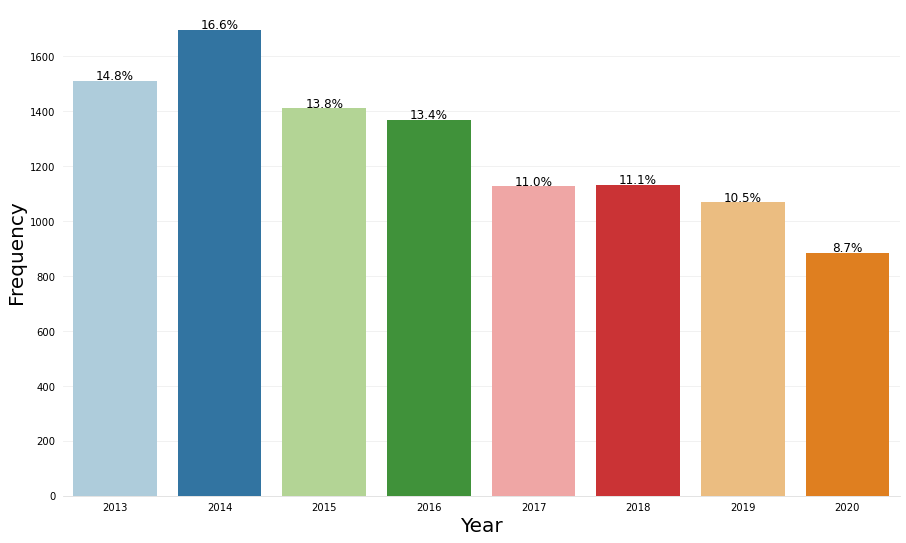

In [36]:
barchart(x_train,'accident_year_x','Frequency','Year',perc=True)

- The number of accidents yearly show a slight downward trend, with accidents peaking in 2014 with 16.6% of all accidents occuring in that year.


- The accident count roughly stays the same from 2017 - 2019. 


- The accident count for 2020 is significantly lower than the rest. The significantly lower accident count of 2020 may also be due to the rise of the COVID pandemic which reduced the number and density of vehicles on roads.

### 6.1.2 Descriptive statistics for Accident Severity

In [37]:
y_train.head()

,accident_severity
3082,3
8906,3
6485,3
723,3
3148,3


In [38]:
y_train.value_counts()

accident_severity
3                    8436
2                    1689
1                      71
dtype: int64

In [39]:
pd.DataFrame(y_train.describe())

,accident_severity
count,10196
unique,3
top,3
freq,8436


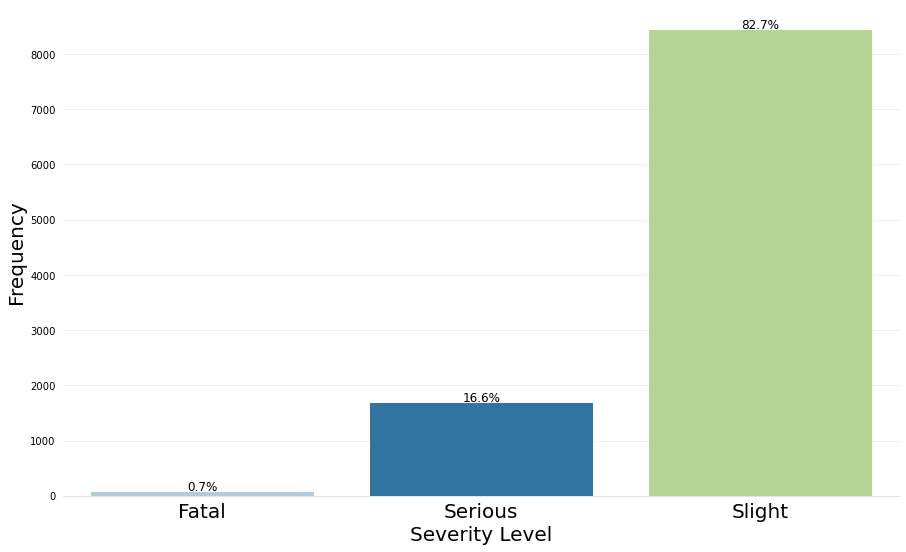

In [40]:
new_barchart(y_train,'accident_severity','Frequency','Severity Level',['Fatal','Serious','Slight'],0,perc=True)

- 82.7% of accidents result in slight injuries, while 16.6% results in serious injuries, and 0.7% results in fatal injuries.


- Comprising 17.3% of all accidents, reducing the occurence of serious and fatal injuries in accidents is a priority.


- Slight injuries are the most frequent kind of injuries in the dataset.

### 6.1.3 Descriptive statistics for Number of Vehicles

In [41]:
x_train['number_of_vehicles'].value_counts()

2     6800
1     1892
3     1083
4      273
5       84
6       33
7       11
12      10
9        6
8        4
Name: number_of_vehicles, dtype: int64

In [42]:
pd.DataFrame(x_train.loc[:,'number_of_vehicles'].describe())

,number_of_vehicles
count,10196.000000
mean,2.033543
std,0.831723
min,1.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,12.000000


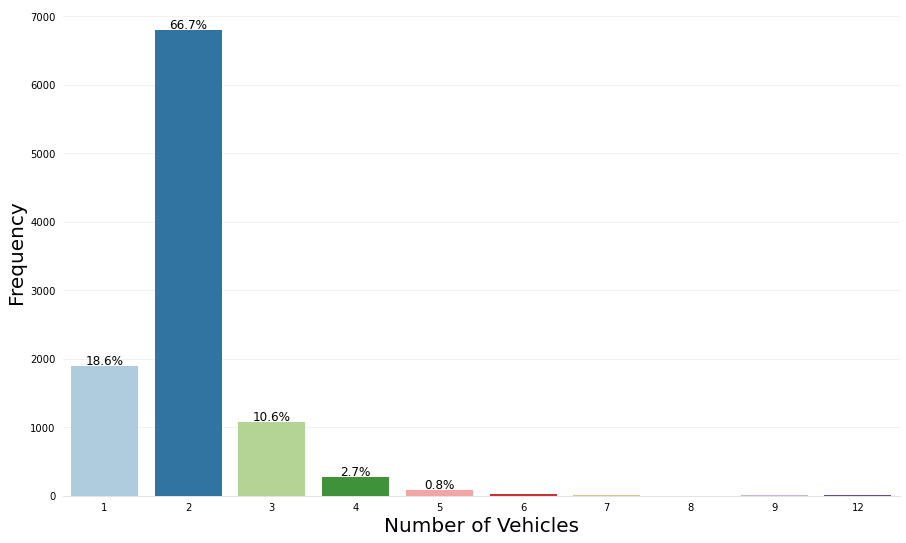

In [43]:
barchart(x_train,'number_of_vehicles','Frequency','Number of Vehicles',perc=True)

- 66.7% of all accidents involve 2 vehicles, 18.6% involve a single vehicle, 10.6% involve 3 vehicles, and 2.7% involve 4 vehicles. The rest are negligible.


- Statistical Analysis will be carried out to check the correlation between vehicles involved in an accident and the severity level of the accident.


- The median of veicles involved in any particular accident is 2, while the mean is 2.03

### 6.1.4 Descriptive statistics for Number of Casualties

In [44]:
x_train['number_of_casualties'].value_counts()

1     7475
2     1645
3      581
4      282
5      113
6       40
7       22
8       19
9        8
10       7
13       2
14       2
Name: number_of_casualties, dtype: int64

In [45]:
pd.DataFrame(x_train.loc[:,'number_of_casualties'].describe())

,number_of_casualties
count,10196.000000
mean,1.465575
std,1.016438
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,14.000000


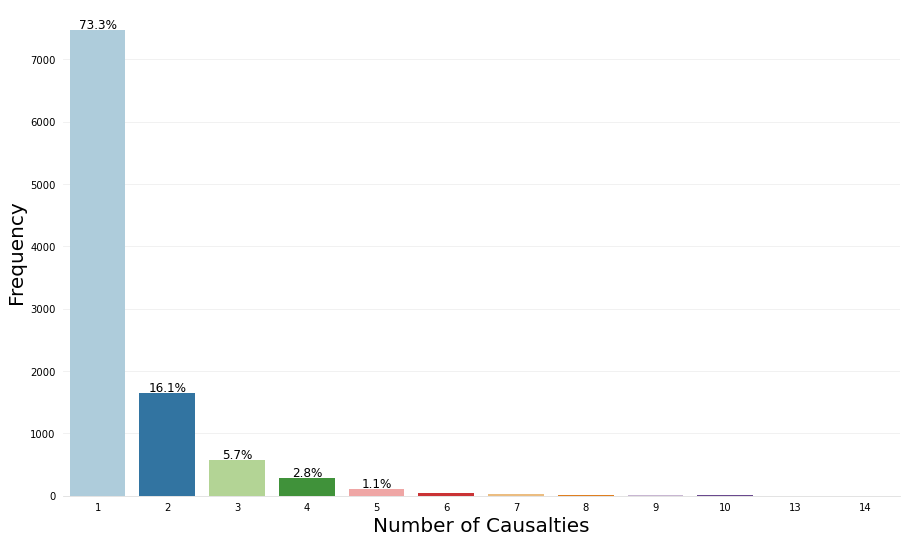

In [46]:
barchart(x_train,'number_of_casualties','Frequency','Number of Causalties',perc=True)

- Most accidents overwhelmingly have 1 casualty with 73.3% of all accidents having 1 casualty. 16.1% of accidents have 2 casualties, while 5.7% of accidents have 3 accidents. The remaining 4.9% of accidents account for accidents with 4 or more casualties.


- The mean number of casualties in any particular accident is 1.4656, while the median is 1.

### 6.1.5 Descriptive statistics for Day of the Week

In [47]:
x_train['day_of_week'] = x_train['day_of_week'].astype('category')

In [48]:
x_train['day_of_week'].value_counts()

6    1680
4    1616
5    1570
3    1497
2    1453
7    1323
1    1057
Name: day_of_week, dtype: int64

In [49]:
pd.DataFrame(x_train.loc[:,'day_of_week'].describe())

,day_of_week
count,10196
unique,7
top,6
freq,1680


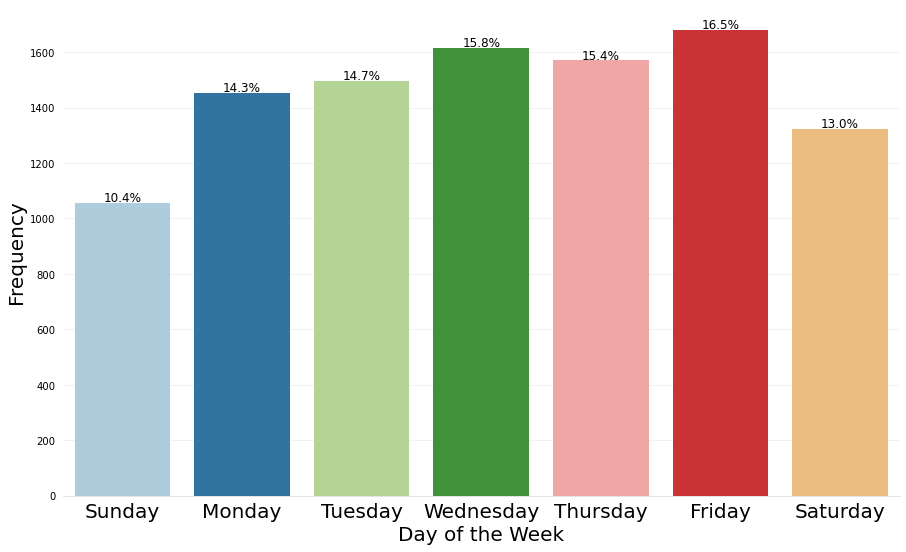

In [50]:
week_list = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

new_barchart(x_train,'day_of_week','Frequency','Day of the Week',week_list,0,perc=True)

- Sunday is the day with the least amount of accidents with 10.4%, with Friday accounting for most accidents with 16.5%.


- Statistical analysis should be run on whether the day of the week corresponds to the frequency of accidents on that day.

### 6.1.6 Descriptive statistics for Time

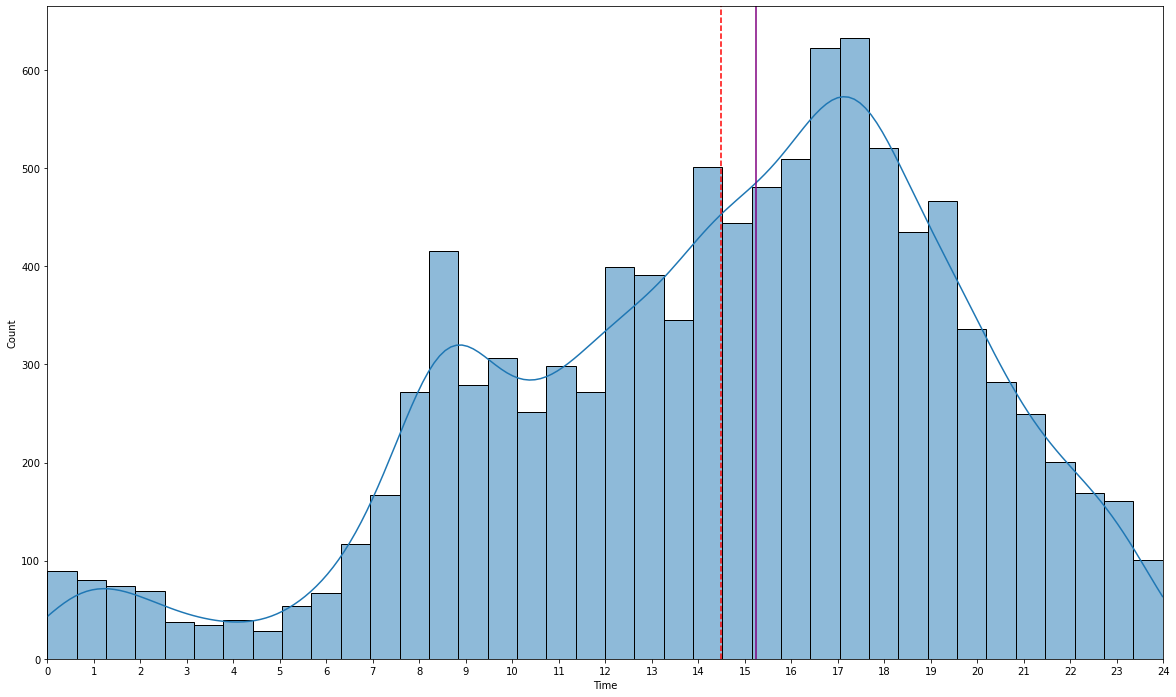

In [51]:
hist_time(x_train,'numeric_fraction')

- The distribution for the time an accident occurs has 1 distinct peak. 


- From the graph this peaks is around 5:30pm.


- It should be noted the hour with the most accident occurence is between 4:30pm and 5:30pm.


- Additionally it should be noted that most accidents occur between 8:00am and 7:00pm before declining sharply.


- The mean time of an accident is ~2:21pm with the median of all accidents being at 3:05pm 

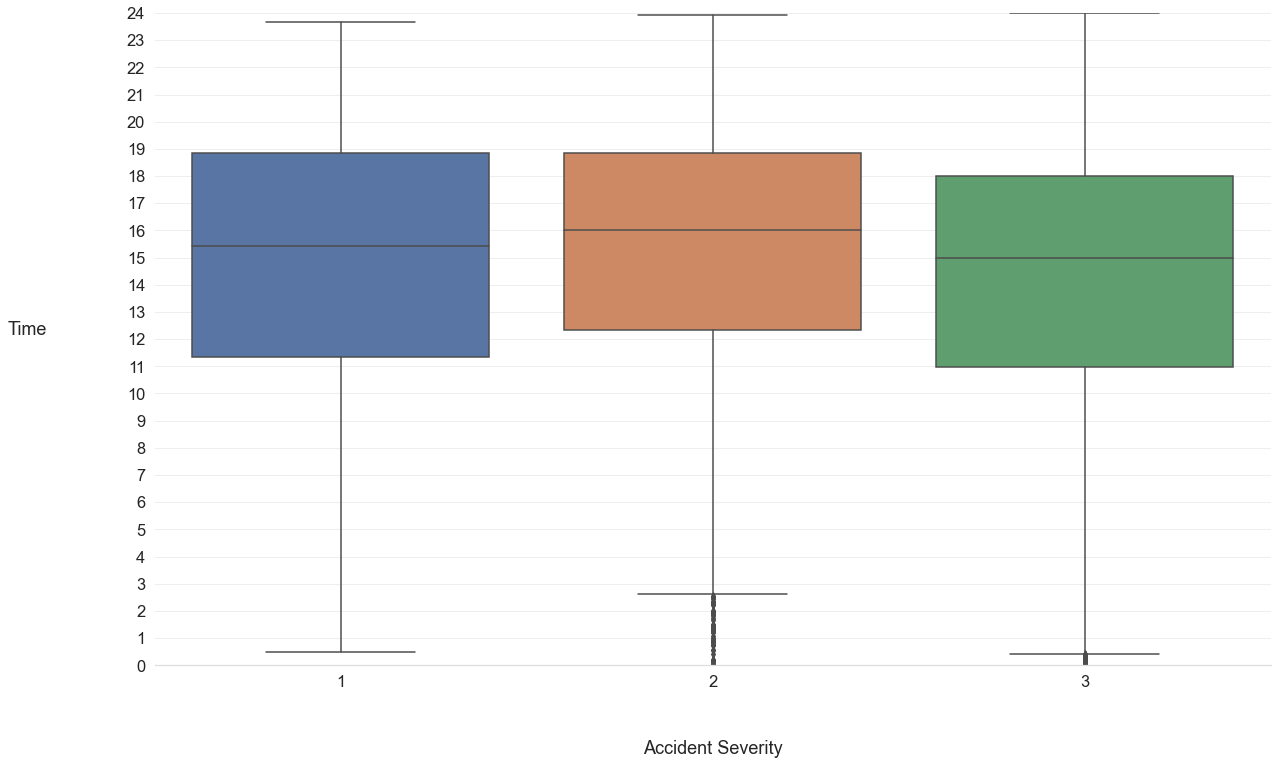

In [52]:
"""

Using a box plot to show the relationship between accident time and accident severity

"""


plt.figure(figsize=(20, 12))


sns.set(font_scale=1.5,rc={'axes.facecolor':'w'})

ax = sns.boxplot(data = x_train,y='numeric_fraction',x= y_train['accident_severity'])

ax.spines['top'].set_visible(False)
    
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')


ax.tick_params(bottom=False, left=False)


ax.set_axisbelow(True)

ax.yaxis.grid(True, color='#EEEEEE')

ax.xaxis.grid(False)

ax.set_ylim(0, 24)

ax.set_yticks(range(0, 25))

ax.set_ylabel('Time', rotation=0, labelpad=100)

ax.set_xlabel('Accident Severity', rotation=0, labelpad=50)


plt.show()

- From the boxplot, the mean time of accidents is slightly higher but roughly the same for serious to fatal accidents.


- Statistical analysis will be carried out to check for correlation between the two variables.

### 6.1.7 Descriptive Statistics for Month

In [53]:
x_train['Month'].value_counts()

11    959
7     931
10    929
9     901
12    854
2     850
1     835
5     829
6     811
3     799
8     769
4     729
Name: Month, dtype: int64

In [54]:
pd.DataFrame(x_train.loc[:,'Month'].describe())

,Month
count,10196.000000
mean,6.642213
std,3.472089
min,1.000000
25%,4.000000
50%,7.000000
75%,10.000000
max,12.000000


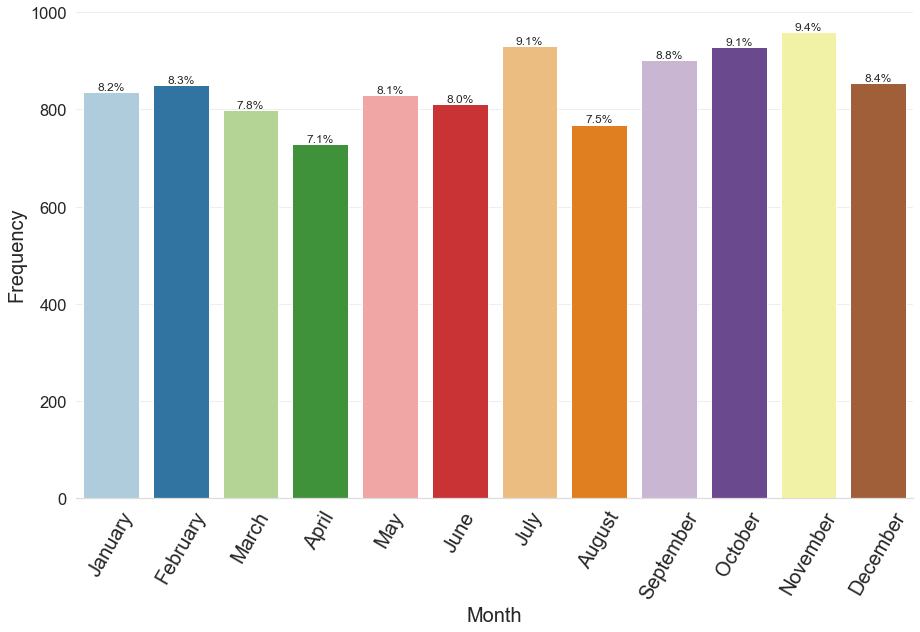

In [55]:
month_list = ['January','February','March','April','May','June','July','August','September','October','November','December']

new_barchart(x_train,'Month','Frequency','Month',month_list,60,perc=True)

- November, December, July, and October are the months with the most occurences of accidents.


- April, February and August are the months with the least occurences of accidents.

In [56]:
x_train['Month'] = x_train['Month'].astype('category')

x_test['Month'] = x_test['Month'].astype('category')

### 6.1.8 Descriptive statistics for First Road Class

In [57]:
x_train['first_road_class'].value_counts()

6    5141
3    4052
4     935
5      50
1      18
Name: first_road_class, dtype: int64

In [58]:
pd.DataFrame(x_train.loc[:,'first_road_class'].describe())

,first_road_class
count,10196
unique,5
top,6
freq,5141


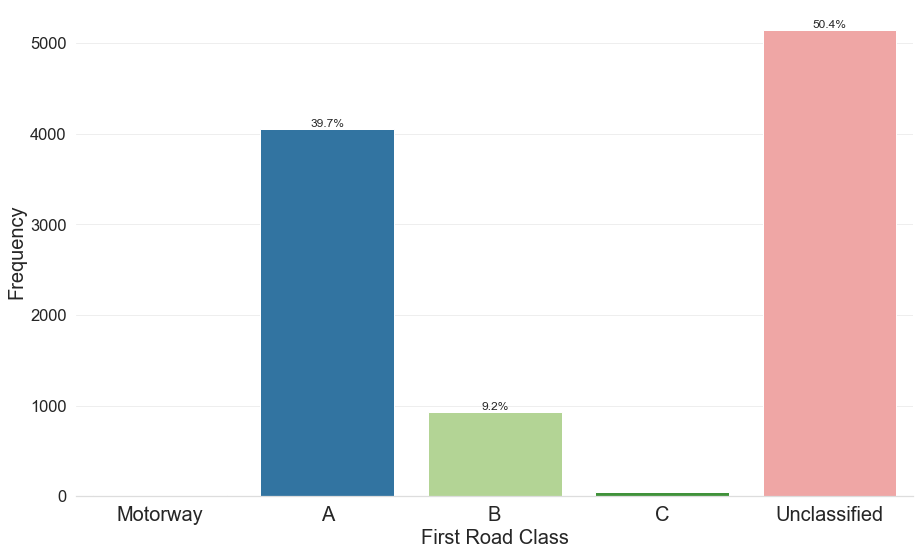

In [59]:
first_road_list = ['Motorway','A','B','C','Unclassified']

new_barchart(x_train,'first_road_class','Frequency','First Road Class',first_road_list,0,perc=True)

- 39.1% of all accidents take place on "A" Roads which is a significant amount. 


- 9.2% take place on "B" Roads while 0.6% take place on "C" roads.


- 50.4% of accidents take place on Unclassified roads which is a significant proportion. Further investigation should be done to either classify these roads, or drop the column altogether.

### 6.1.9 Descriptive statistics for First Road Number

In [60]:
x_train['first_road_number'].value_counts()

0       5191
580      506
5058     455
562      427
57       393
        ... 
1          1
5399       1
5032       1
570        1
58         1
Name: first_road_number, Length: 62, dtype: int64

In [61]:
x_train['first_road_number'].nunique()

62

In [62]:
pd.DataFrame(x_train.loc[:,'first_road_number'].describe())

,first_road_number
count,10196.000000
mean,1449.399372
std,2212.190307
min,0.000000
25%,0.000000
50%,0.000000
75%,5037.000000
max,5399.000000


- After looking into this categorical variable, no obvious ways to perform descriptive statistics on the variable occurs to me at this moment.


### 6.1.10 Descriptive statistics for Road Type

In [63]:
x_train['road_type'].value_counts()

6    6677
3    3038
2     261
1     181
7      20
9      19
Name: road_type, dtype: int64

In [64]:
pd.DataFrame(x_train.loc[:,'road_type'].describe())

,road_type
count,10196
unique,6
top,6
freq,6677


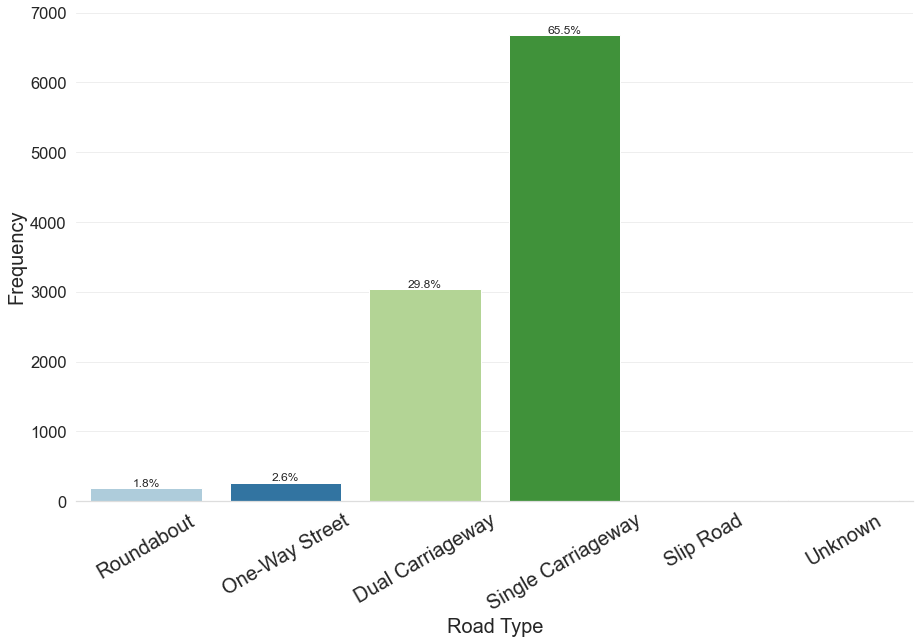

In [65]:
road_type_list = ['Roundabout','One-Way Street','Dual Carriageway','Single Carriageway','Slip Road','Unknown']

new_barchart(x_train,'road_type','Frequency','Road Type',road_type_list,30,perc=True)

- Most accidents happen on Single Carriageway Roads with 65.5%


- 29.8% of accidents happen on Dual Carriageway Roads while 2.6% of all accidents happen on One-Way Streets.


- Statistical analysis should be carried out on whether Road Type affects accident severity or frequency.

### 6.1.11 Descriptive statistics for Speed Limit

In [66]:
x_train['speed_limit'].value_counts()

30.0    8247
40.0    1200
20.0     705
50.0      21
70.0      14
60.0       9
Name: speed_limit, dtype: int64

In [67]:
pd.DataFrame(x_train.loc[:,'speed_limit'].describe())

,speed_limit
count,10196.000000
mean,30.608082
std,4.704405
min,20.000000
25%,30.000000
50%,30.000000
75%,30.000000
max,70.000000


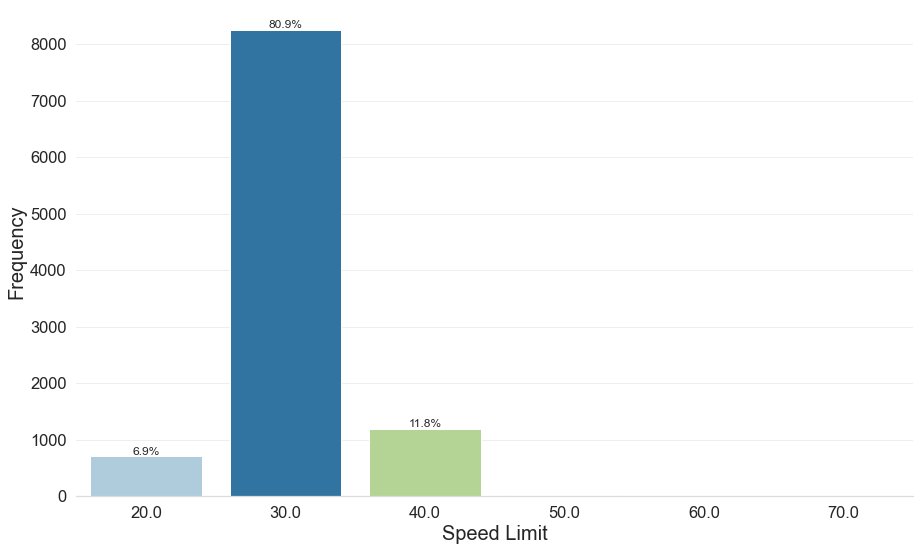

In [68]:
barchart(x_train,'speed_limit','Frequency','Speed Limit',perc=True)

- 80.9% of accidents occur where the speed limit is 30. This is a significant amount and should be investigated.


- 11.8% occur where the speed limit is 40 while 6.9% of accidents happen where the speed limit is 20.


- There seems to be no trend of higher speed limits resulting in higher accidents.


- The mean speed limit in accidents is 30.61, while the median is 30.0

### 6.1.12 Descriptive statistics for Junction Detail

In [69]:
x_train['junction_detail'].value_counts()

3     3280
0     3142
6     2228
9      512
7      431
1      394
8       86
5       82
2       24
99      17
Name: junction_detail, dtype: int64

In [70]:
pd.DataFrame(x_train.loc[:,'junction_detail'].describe())

,junction_detail
count,10196
unique,10
top,3
freq,3280


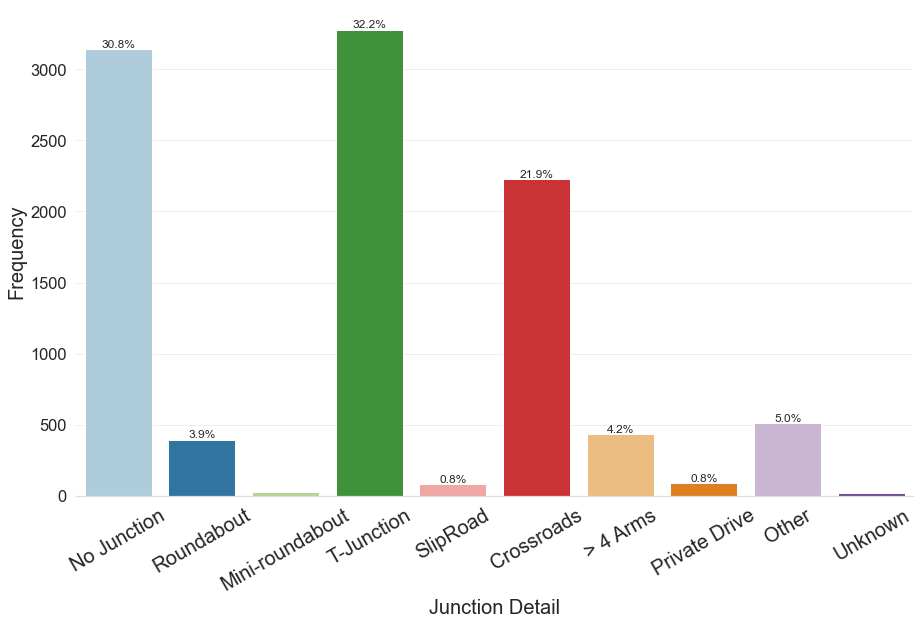

In [71]:
junction_detail_list = ['No Junction','Roundabout','Mini-roundabout','T-Junction','SlipRoad','Crossroads','> 4 Arms','Private Drive','Other','Unknown']

new_barchart(x_train,'junction_detail','Frequency','Junction Detail',junction_detail_list,30,perc=True)

- 30.6% of all accidents happen where there aren't junctions with 2788 occurences.


- 33.7% happen at T-Junctions, 20.4% happen at Crossroads, and 3.4% of accidents happen at Roundabouts.


- The remaining junction details account for a combined 11.9% of accidents.

### 6.1.13 Descriptive statistics for Pedestrian Crossing Human Control

In [72]:
x_train['pedestrian_crossing_human_control'].value_counts()

0    10050
2       92
1       29
9       25
Name: pedestrian_crossing_human_control, dtype: int64

In [73]:
pd.DataFrame(x_train.loc[:,'pedestrian_crossing_human_control'].describe())

,pedestrian_crossing_human_control
count,10196
unique,4
top,0
freq,10050


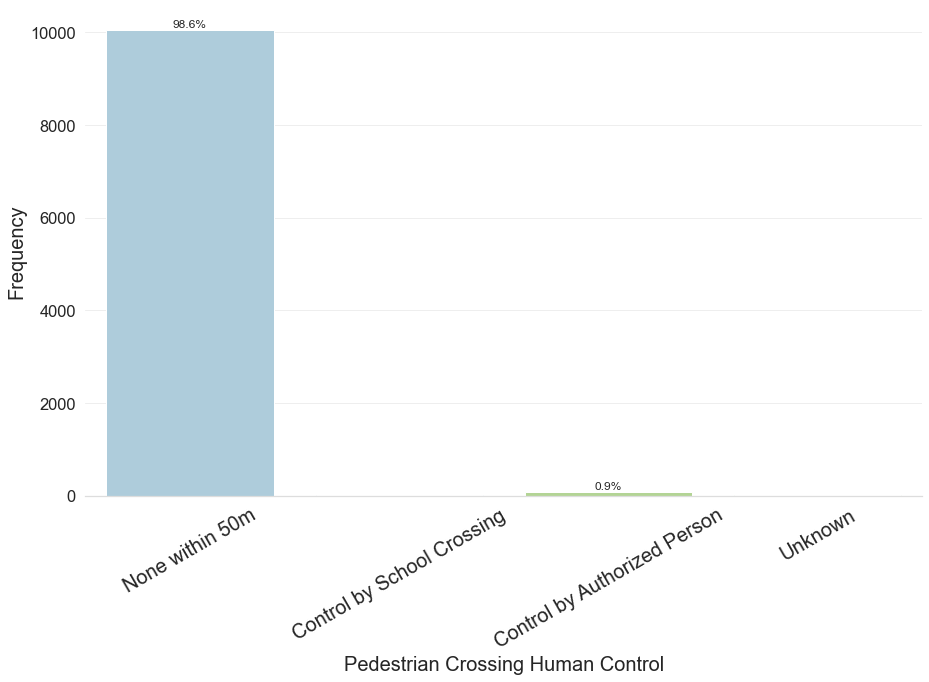

In [74]:
pedestrian_crossing_human_control_list = ['None within 50m','Control by School Crossing','Control by Authorized Person','Unknown']

new_barchart(x_train,'pedestrian_crossing_human_control','Frequency','Pedestrian Crossing Human Control',pedestrian_crossing_human_control_list,30,perc=True)

- 98.6% of all accidents happen where there isn't a pedestrian crossing human control within 50m with 8160 occurences.


- This is a huge margin. From the data, there should be more Pedestrian Crossings controlled by Humans on roads to limit accidents.

### 6.1.14 Descriptive statistics for Pedestrian Crossing Physical Facilities

In [75]:
x_train['pedestrian_crossing_physical_facilities'].value_counts()

0    7672
5    1485
4     690
1     182
8     142
9      20
7       5
Name: pedestrian_crossing_physical_facilities, dtype: int64

In [76]:
pd.DataFrame(x_train.loc[:,'pedestrian_crossing_physical_facilities'].describe())

,pedestrian_crossing_physical_facilities
count,10196
unique,7
top,0
freq,7672


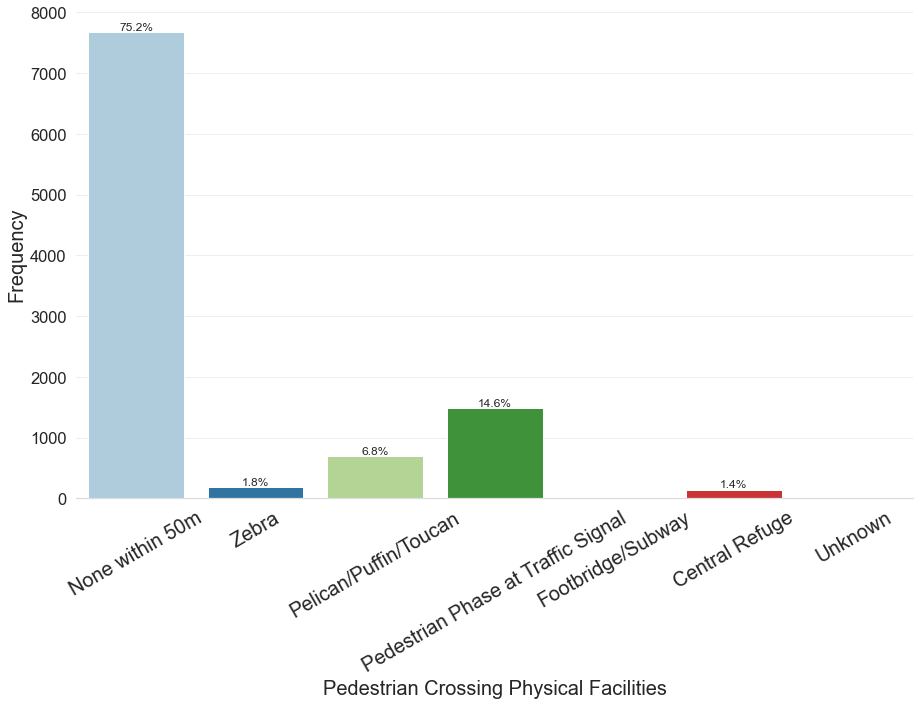

In [77]:
pedestrian_crossing_physical_facilities_list = ['None within 50m','Zebra','Pelican/Puffin/Toucan','Pedestrian Phase at Traffic Signal','Footbridge/Subway','Central Refuge','Unknown']

new_barchart(x_train,'pedestrian_crossing_physical_facilities','Frequency','Pedestrian Crossing Physical Facilities',pedestrian_crossing_physical_facilities_list,30,perc=True)

- 75.2% of accidents occur when there are no physical pedestrian crossing facilities within 50m of the accident site with 7672 occurences.


- 14.6% of accidents happen at the pedestrian phase at a traffic signal, 6.8% off accidents happen at Pelican, while 1.8% of accidents happen at Zebra crossings.

### 6.1.15 Descriptive statistics for Light Conditions

In [78]:
x_train['light_conditions'].value_counts()

1    7273
4    2742
7      86
5      68
6      27
Name: light_conditions, dtype: int64

In [79]:
pd.DataFrame(x_train.loc[:,'light_conditions'].describe())

,light_conditions
count,10196
unique,5
top,1
freq,7273


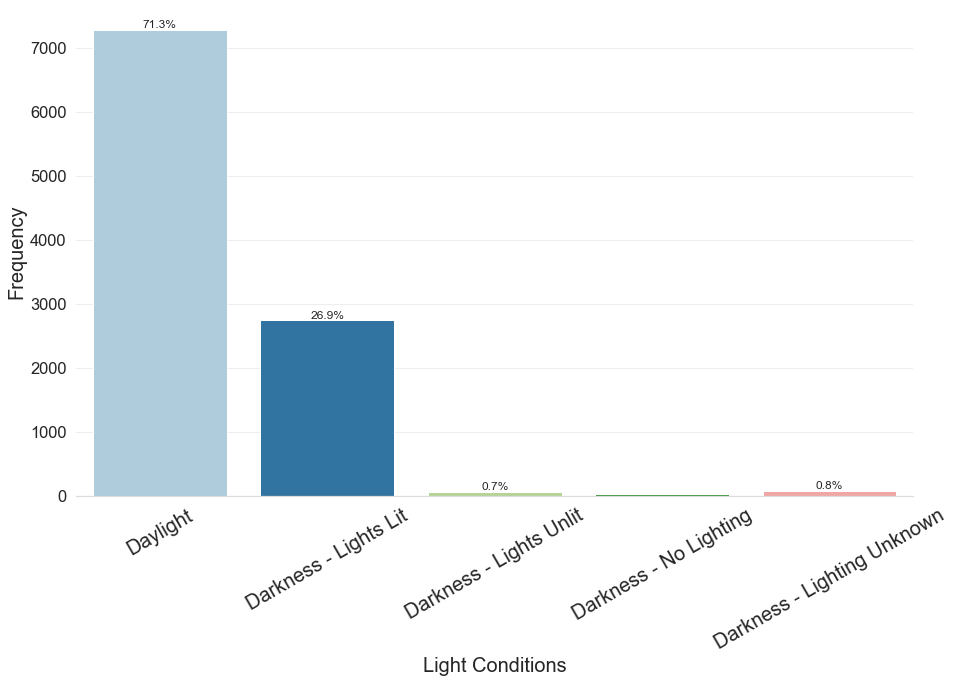

In [80]:

light_conditions_list = ['Daylight','Darkness - Lights Lit','Darkness - Lights Unlit','Darkness - No Lighting','Darkness - Lighting Unknown']

new_barchart(x_train,'light_conditions','Frequency','Light Conditions',light_conditions_list,30,perc=True)

- 71.3% of all accidents occur in Daylight with 5922 occurences.


- Next is 26.9% of accidents which occur in Darkness with Lights Lit. 0.7% of accidents happen in Darkness with Lights Unlit.


- This shows adverse lighting conditions have little effect on the frequency of accidents.

### 6.1.16 Descriptive statistics for Weather Conditions

In [81]:
x_train['weather_conditions'].value_counts()

1    8560
2    1102
9     167
4     127
5     123
8      73
3      26
7      12
6       6
Name: weather_conditions, dtype: int64

In [82]:
pd.DataFrame(x_train.loc[:,'weather_conditions'].describe())

,weather_conditions
count,10196
unique,9
top,1
freq,8560


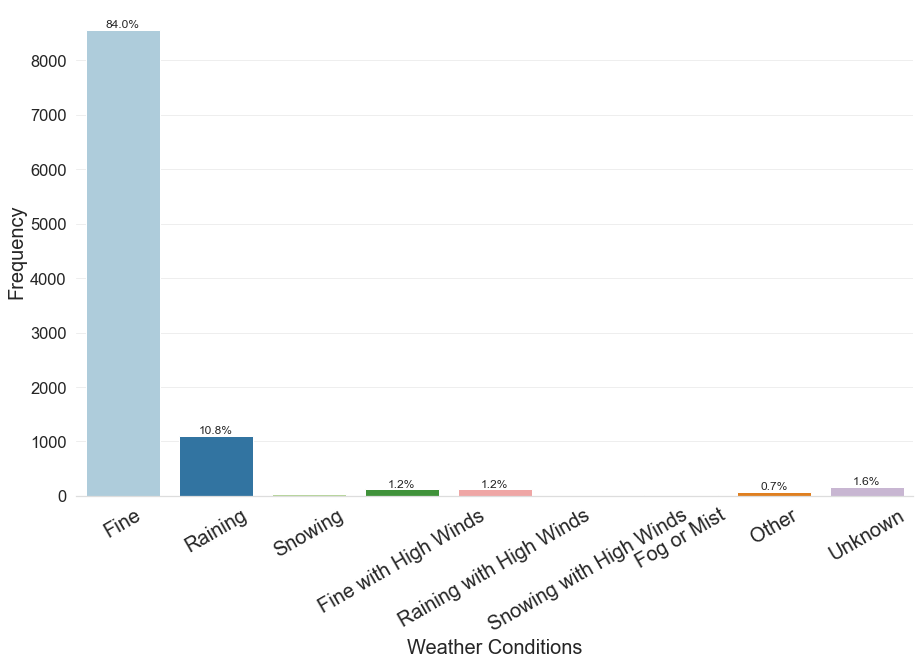

In [83]:
weather_conditions_list = ['Fine','Raining','Snowing','Fine with High Winds','Raining with High Winds','Snowing with High Winds','Fog or Mist','Other','Unknown']

new_barchart(x_train,'weather_conditions','Frequency','Weather Conditions',weather_conditions_list,30,perc=True)

- With 7656 occurences, 84.0% of all accidents occur when the weather is fine while 10.8% of all accidents happen when it's Raining.


- This shows adverse weather conditions have little to no effect on whether an accident occurs.

### 6.1.17 Descriptive statistics for Road Surface Conditions

In [84]:
x_train['road_surface_conditions'].value_counts()

1    7673
2    2419
9      43
4      40
3      16
5       5
Name: road_surface_conditions, dtype: int64

In [85]:
pd.DataFrame(x_train.loc[:,'road_surface_conditions'].describe())

,road_surface_conditions
count,10196
unique,6
top,1
freq,7673


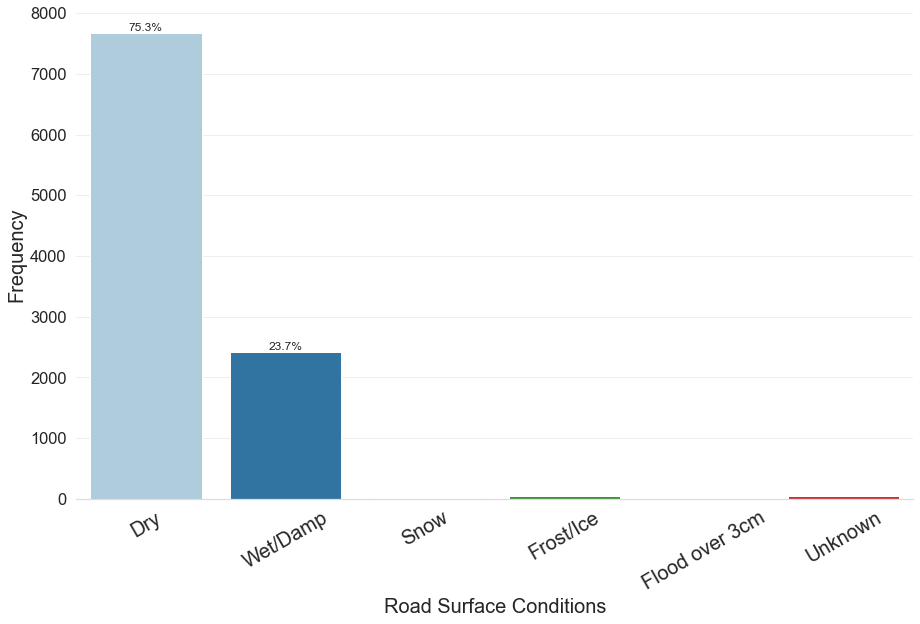

In [86]:
road_surface_conditions_list = ['Dry','Wet/Damp','Snow','Frost/Ice','Flood over 3cm','Unknown']

new_barchart(x_train,'road_surface_conditions','Frequency','Road Surface Conditions',road_surface_conditions_list,30,perc=True)

- 75.3% of accidents happen in Dry weather conditions with Wet/Damp conditions a distant second with 23.7%.


- The mode of this column is 'Dry' with 7673 occurences.

### 6.1.18 Descriptive statistics for Special Conditions at Site

In [87]:
x_train['special_conditions_at_site'].value_counts()

0    9932
4     121
1      38
3      26
5      23
9      21
2      19
6      14
7       2
Name: special_conditions_at_site, dtype: int64

In [88]:
pd.DataFrame(x_train.loc[:,'special_conditions_at_site'].describe())

,special_conditions_at_site
count,10196
unique,9
top,0
freq,9932


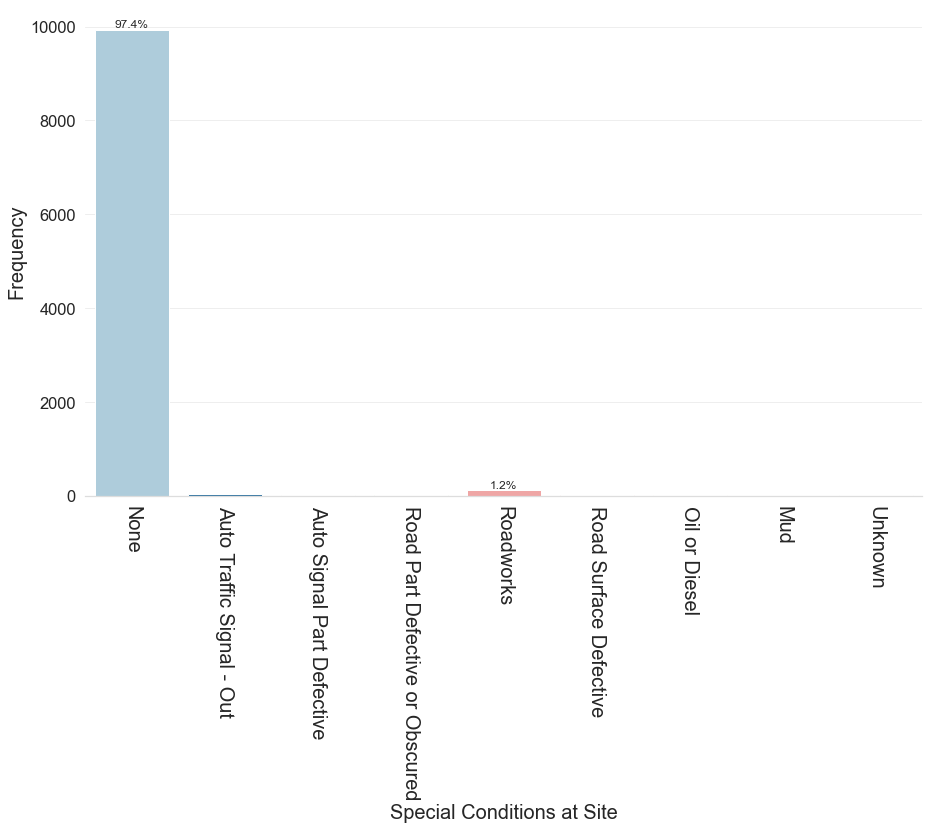

In [89]:
special_conditions_at_site_list = ['None','Auto Traffic Signal - Out','Auto Signal Part Defective','Road Part Defective or Obscured','Roadworks','Road Surface Defective','Oil or Diesel','Mud','Unknown']

new_barchart(x_train,'special_conditions_at_site','Frequency','Special Conditions at Site',special_conditions_at_site_list,270,perc=True)

- 97.4% of all accidents occur where there are no special conditions at site.


- This shows special conditions at site have little to no effect on where or whether an accident occurs.

### 6.1.19 Descriptive Statistics for Age of Driver

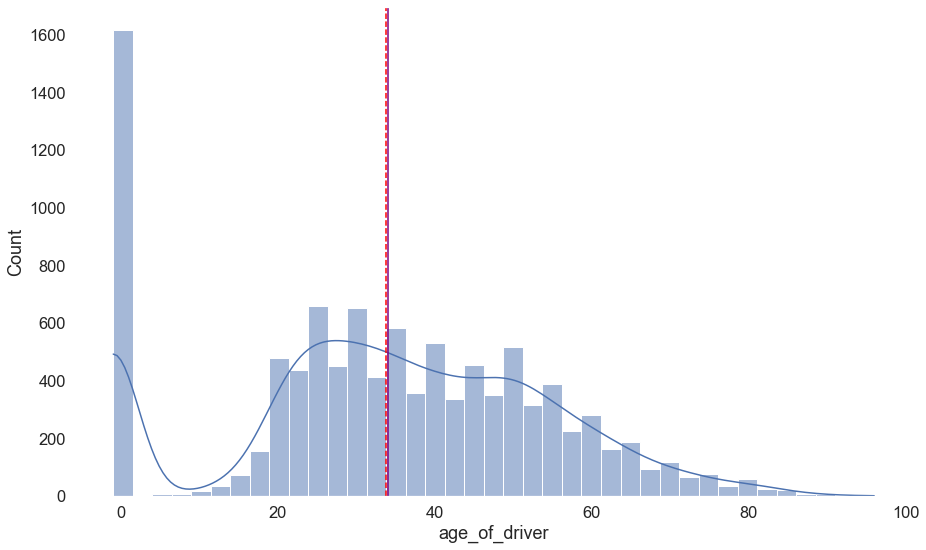

In [90]:
hist(x_train,'age_of_driver')

### 6.1.20 Descriptive statistics for Urban or Rural Area

In [91]:
x_train['urban_or_rural_area'].value_counts()

1    10021
2      175
3        0
Name: urban_or_rural_area, dtype: int64

In [92]:
pd.DataFrame(x_train.loc[:,'urban_or_rural_area'].describe())

,urban_or_rural_area
count,10196
unique,2
top,1
freq,10021


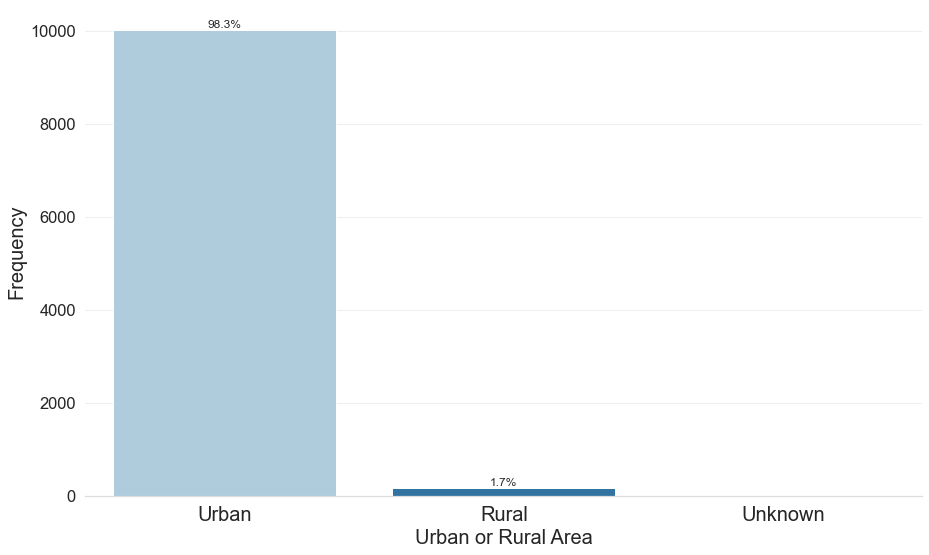

In [93]:
urban_or_rural_area_list = ['Urban','Rural','Unknown']

new_barchart(x_train,'urban_or_rural_area','Frequency','Urban or Rural Area',urban_or_rural_area_list,0,perc=True)

- 98.3% of accidents with 8156 occurences hapen in Urban areas while 1.4% happen in Rural areas.


- This mostly has to the with Liverpool being almost entirely an Urban Area.

### 6.1.21 Descriptive statistics for Police Office Attendance

In [94]:
x_train['did_police_officer_attend_scene_of_accident'].value_counts()

1    7859
2    2073
3     264
Name: did_police_officer_attend_scene_of_accident, dtype: int64

In [95]:
pd.DataFrame(x_train.loc[:,'did_police_officer_attend_scene_of_accident'].describe())

,did_police_officer_attend_scene_of_accident
count,10196
unique,3
top,1
freq,7859


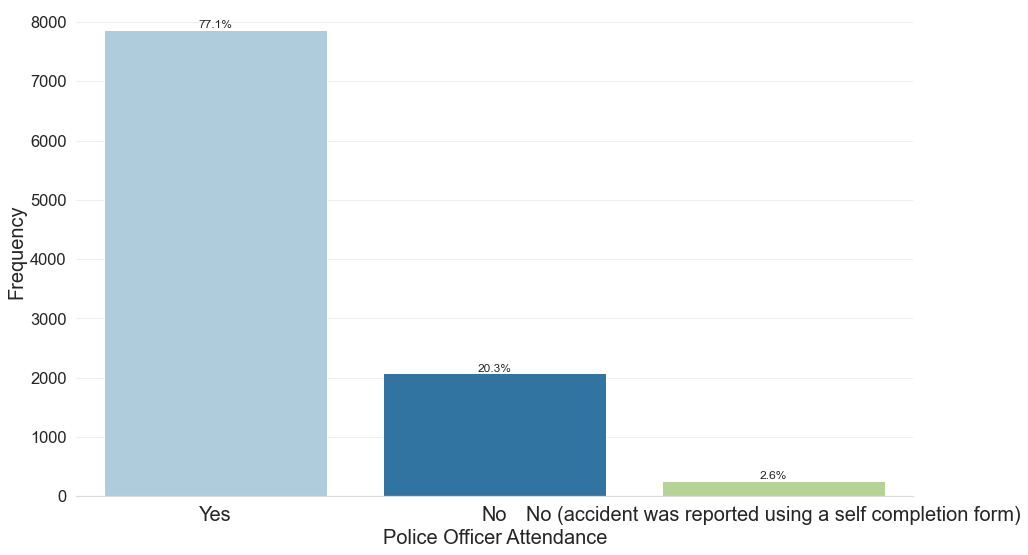

In [96]:
did_police_officer_attend_scene_of_accident_list = ['Yes','No','No (accident was reported using a self completion form)']

new_barchart(x_train,'did_police_officer_attend_scene_of_accident','Frequency','Police Officer Attendance',did_police_officer_attend_scene_of_accident_list,0,perc=True)

- 77.1% of all accidents were attended to by a Police officer with 20.3% no having Police Attendance.


- 2.6% of accidents have no Police Attendance and was reported using a self completion form.

### 6.1.21 Descriptive statistics for Sex of Driver

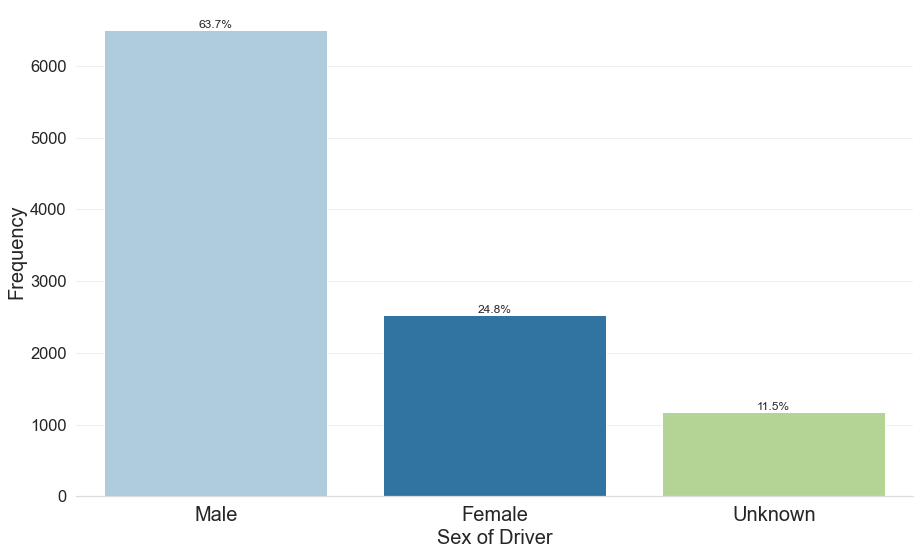

In [97]:
new_barchart(x_train,'sex_of_driver','Frequency','Sex of Driver',['Male','Female','Unknown'],0,perc=True)

- Most Accidents are gotten into by Men with 63.7%

## 7. Data Cleaning

In [98]:
"""
Dropping the status column from both training and testing datasets
"""
x_train = x_train.drop(['pedestrian_crossing_human_control'],axis=1)
x_test = x_test.drop(['pedestrian_crossing_human_control'],axis=1)


### 7.1 Checking for missing values

In [99]:
x_train.isnull().sum()

accident_year_x                                0
longitude                                      0
latitude                                       0
number_of_vehicles                             0
number_of_casualties                           0
day_of_week                                    0
first_road_class                               0
first_road_number                              0
road_type                                      0
speed_limit                                    0
junction_detail                                0
junction_control                               0
second_road_class                              0
second_road_number                             0
pedestrian_crossing_physical_facilities        0
light_conditions                               0
weather_conditions                             0
road_surface_conditions                        0
special_conditions_at_site                     0
urban_or_rural_area                            0
did_police_officer_a

In [100]:
x_test.isnull().sum()

accident_year_x                                0
longitude                                      2
latitude                                       2
number_of_vehicles                             0
number_of_casualties                           0
day_of_week                                    0
first_road_class                               0
first_road_number                              0
road_type                                      0
speed_limit                                    0
junction_detail                                0
junction_control                               0
second_road_class                              0
second_road_number                             0
pedestrian_crossing_physical_facilities        0
light_conditions                               0
weather_conditions                             0
road_surface_conditions                        0
special_conditions_at_site                     0
urban_or_rural_area                            0
did_police_officer_a

In [101]:
"""
Dropping data with missing rows in x_train and x_test

"""

x_train.dropna(inplace=True)
x_test.dropna(inplace=True)



In [102]:
x_train.shape

(10196, 38)

In [103]:
x_test.shape

(4369, 38)

### 7.2 Dropping all Duplicate Occurences in the Dataset



In [104]:
x_train.drop_duplicates(inplace=True)
x_test.drop_duplicates(inplace=True)

In [105]:
"""
Checking the current count of missing values in the Dataset

"""

x_train.isnull().sum()

accident_year_x                                0
longitude                                      0
latitude                                       0
number_of_vehicles                             0
number_of_casualties                           0
day_of_week                                    0
first_road_class                               0
first_road_number                              0
road_type                                      0
speed_limit                                    0
junction_detail                                0
junction_control                               0
second_road_class                              0
second_road_number                             0
pedestrian_crossing_physical_facilities        0
light_conditions                               0
weather_conditions                             0
road_surface_conditions                        0
special_conditions_at_site                     0
urban_or_rural_area                            0
did_police_officer_a

In [106]:
x_test.isnull().sum()

accident_year_x                                0
longitude                                      0
latitude                                       0
number_of_vehicles                             0
number_of_casualties                           0
day_of_week                                    0
first_road_class                               0
first_road_number                              0
road_type                                      0
speed_limit                                    0
junction_detail                                0
junction_control                               0
second_road_class                              0
second_road_number                             0
pedestrian_crossing_physical_facilities        0
light_conditions                               0
weather_conditions                             0
road_surface_conditions                        0
special_conditions_at_site                     0
urban_or_rural_area                            0
did_police_officer_a

### 7.3 -1 is used to indicate missing values in the Dataset therefore counting the occurences of -1 in each column will give the number of missing values in the Dataset.

In [107]:
x_train.columns

Index(['accident_year_x', 'longitude', 'latitude', 'number_of_vehicles',
       'number_of_casualties', 'day_of_week', 'first_road_class',
       'first_road_number', 'road_type', 'speed_limit', 'junction_detail',
       'junction_control', 'second_road_class', 'second_road_number',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'urban_or_rural_area',
       'did_police_officer_attend_scene_of_accident', 'trunk_road_flag',
       'lsoa_of_accident_location', 'vehicle_type', 'towing_and_articulation',
       'vehicle_manoeuvre', 'vehicle_location_restricted_lane',
       'hit_object_in_carriageway', 'vehicle_leaving_carriageway',
       'hit_object_off_carriageway', 'first_point_of_impact',
       'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver',
       'propulsion_code', 'age_of_vehicle', 'numeric_fraction', 'Month'],
      dtype='object')

In [108]:
# create an empty dictionary to store the counts
counts_dict_train = {}
counts_dict_test = {}

#list of columns to be checked

cols_checked = ['accident_year_x', 'longitude', 'latitude', 'number_of_vehicles',
       'number_of_casualties', 'day_of_week', 'first_road_class',
       'first_road_number', 'road_type', 'speed_limit', 'junction_detail',
       'junction_control', 'second_road_class', 'second_road_number',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'urban_or_rural_area',
       'did_police_officer_attend_scene_of_accident', 'trunk_road_flag',
       'lsoa_of_accident_location', 'vehicle_type', 'towing_and_articulation',
       'vehicle_manoeuvre', 'vehicle_location_restricted_lane',
       'hit_object_in_carriageway', 'vehicle_leaving_carriageway',
       'hit_object_off_carriageway', 'first_point_of_impact',
       'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver',
       'propulsion_code', 'age_of_vehicle', 'numeric_fraction', 'Month']

# loop through the columns of the DataFrame
for col in cols_checked:
    
    try:
        # count the occurrence of the number -1 in the column
        counts_train = x_train[col].value_counts()['-1']
        counts_test = x_test[col].value_counts()['-1']
    
        # add the count to the dictionary with the column name as the key
        counts_dict_train[col] = counts_train
        counts_dict_test[col] = counts_test

        
    except KeyError:
        continue
    
# create a new DataFrame from the dictionary
counts_df_train = pd.DataFrame(counts_dict_train.items(), columns=['Column Name', 'Count'])

counts_df_test = pd.DataFrame(counts_dict_test.items(), columns=['Column Name', 'Count'])

# shows the counts DataFrame
counts_df_train


,Column Name,Count
0,lsoa_of_accident_location,289


### Explore value counts of all columns to decide which to drop or keep

In [109]:
for column in x_train.columns:
    value_counts = df[column].value_counts()
    print(f"Value counts for {column}:")
    print(value_counts)
    print("--------------------")


Value counts for accident_year_x:
2014    2467
2013    2132
2015    2064
2016    1890
2018    1604
2017    1582
2019    1554
2020    1274
Name: accident_year_x, dtype: int64
--------------------
Value counts for longitude:
-2.991505    12
-2.955487    12
-2.934542    10
-2.961982    10
-2.978865    10
             ..
-2.909668     1
-2.967326     1
-2.928815     1
-2.924953     1
-2.921018     1
Name: longitude, Length: 7426, dtype: int64
--------------------
Value counts for latitude:
53.411345    13
53.390480    12
53.403418    12
53.462620    11
53.397681    10
             ..
53.399982     1
53.429331     1
53.404940     1
53.391919     1
53.382150     1
Name: latitude, Length: 7317, dtype: int64
--------------------
Value counts for number_of_vehicles:
2     9647
1     2734
3     1612
4      368
5      115
6       48
7       14
12      12
9        9
8        8
Name: number_of_vehicles, dtype: int64
--------------------
Value counts for number_of_casualties:
1     10750
2      2290

- Half of first road class is unclassified so the column will be dropped.
- Also, first road number will be dropped

- Junction control will be dropped as a column

- Second Road Class will be dropped as a column

- Second Road Number will be dropped as a column

- Drop class 3 for rural_or_urban_area

- Fill class 3 of sex_of_driver with median

- Drop propulsion code

- Fill missing age of driver with mean

- Fill missing age of vehicle with mean

### Dropping columns selected to be dropped

In [110]:
x_train = x_train.drop(['first_road_class','first_road_number',
                       'junction_control','second_road_class',
                       'second_road_number','propulsion_code',
                        'journey_purpose_of_driver','towing_and_articulation'],
                       axis=1)
x_test = x_test.drop(['first_road_class','first_road_number',
                       'junction_control','second_road_class',
                       'second_road_number','propulsion_code',
                     'journey_purpose_of_driver','towing_and_articulation'],
                       axis=1)

In [111]:
print (x_train.shape)
print (x_test.shape)

(10192, 30)
(4369, 30)


- Current shape of the dataset is 10,192 rows and 32 columns for the training dataset
- Current shape of the dataset is 4,369 rows and 32 columns for the testing dataset

### Drop class 3 for rural_or_urban_area

In [112]:
x_train['urban_or_rural_area'] = x_train['urban_or_rural_area'].replace('3', np.nan)
x_test['urban_or_rural_area'] = x_test['urban_or_rural_area'].replace('3', np.nan)

### Fill class 3 of sex_of_driver with median

In [113]:
# replace class 3 with null values
x_train['sex_of_driver'] = x_train['sex_of_driver'].replace('3', np.nan)

# Find the mode value of the column
mode_value = x_train['sex_of_driver'].mode()[0]

# Fill missing values with the mode value
x_train['sex_of_driver'].fillna(value=mode_value, inplace=True)

# replace class 3 with null values
x_test['sex_of_driver'] = x_test['sex_of_driver'].replace('3', np.nan)

# Find the mode value of the column
mode_value = x_test['sex_of_driver'].mode()[0]

# Fill missing values with the mode value
x_test['sex_of_driver'].fillna(value=mode_value, inplace=True)

### Fill missing age of driver with mean

In [114]:
# replace class 3 with null values
x_train['age_of_driver'] = x_train['age_of_driver'].replace(-1, np.nan)

# Find the mode value of the column
mean_value = x_train['age_of_driver'].mean()

# Fill missing values with the mode value
x_train['age_of_driver'].fillna(value=mean_value, inplace=True)

# replace class 3 with null values
x_test['age_of_driver'] = x_test['age_of_driver'].replace(-1, np.nan)

# Find the mode value of the column
mean_value = x_test['age_of_driver'].mean()

# Fill missing values with the mode value
x_test['age_of_driver'].fillna(value=mean_value, inplace=True)

### Fill missing age of vehicle with mean

In [115]:
# replace class 3 with null values
x_train['age_of_vehicle'] = x_train['age_of_vehicle'].replace(-1, np.nan)

# Find the mode value of the column
mean_value = x_train['age_of_vehicle'].mean()

# Fill missing values with the mode value
x_train['age_of_vehicle'].fillna(value=mean_value, inplace=True)

# replace class 3 with null values
x_test['age_of_vehicle'] = x_test['age_of_vehicle'].replace(-1, np.nan)

# Find the mode value of the column
mean_value = x_test['age_of_vehicle'].mean()

# Fill missing values with the mode value
x_test['age_of_vehicle'].fillna(value=mean_value, inplace=True)

In [116]:
print (x_train.shape)
print (x_test.shape)

(10192, 30)
(4369, 30)


### 7.4 Removing missing values in the dataset indicated by the "-1", "99", or "9" value

In [117]:
# First, replacing -1 with Nan

x_train = x_train.replace('-1', np.nan)
x_test = x_test.replace('-1', np.nan)

x_train = x_train.replace('99', np.nan)
x_test = x_test.replace('99', np.nan)

x_train = x_train.replace('9', np.nan)
x_test = x_test.replace('9', np.nan)

# Then, dropping all missing values from the dataset

x_train.dropna(inplace=True)
x_test.dropna(inplace=True)

In [118]:
print (x_train.shape)
print (x_test.shape)

(9903, 30)
(4270, 30)


- Current shape of the dataset is 9,903 rows and 32 columns for the training dataset
- Current shape of the dataset is 4,270 rows and 32 columns for the testing dataset

### Dropping corresponding rows of dropped x_train and x_test dataframe in y_train and y_test

In [119]:

# create a Boolean mask of the rows to keep using the indices of x_train and x_test

mask_train = y_train.index.isin(x_train.index.tolist())
mask_test = y_test.index.isin(x_test.index.tolist())

# filter the dataframe using the mask
y_train = y_train.loc[mask_train]
y_test = y_test.loc[mask_test]


# check shape of dataframes

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9903, 30)
(4270, 30)
(9903, 1)
(4270, 1)


In [120]:
x_train.head()

,accident_year_x,longitude,latitude,number_of_vehicles,number_of_casualties,day_of_week,road_type,speed_limit,junction_detail,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,vehicle_type,vehicle_manoeuvre,vehicle_location_restricted_lane,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_driver,age_of_vehicle,numeric_fraction,Month
3082,2014,-2.970475,53.401515,1,1,6,6,30.0,6,4,1,1,2,0,1,1,2,E01006514,9,18,0,0,0,0,1,2,19.000000,11.000000,13.666667,1
8906,2017,-2.858726,53.380651,2,1,4,6,30.0,0,0,1,1,1,0,1,1,2,E01006793,9,18,0,0,0,0,1,3,40.267133,6.575705,8.166667,3
6485,2015,-2.989915,53.407476,2,2,5,2,30.0,3,0,4,2,2,0,1,1,2,E01033752,8,18,0,0,0,0,4,1,41.000000,7.000000,7.416667,12
723,2013,-2.946467,53.408180,2,1,3,3,30.0,0,0,1,1,1,0,1,1,2,E01033763,19,12,0,0,0,0,3,1,53.000000,8.000000,15.766667,6
1910,2013,-2.894392,53.396248,1,1,2,6,30.0,0,0,1,1,1,0,1,1,2,E01006579,9,1,0,0,0,0,2,2,42.000000,10.000000,13.500000,4


In [121]:
x_test.head()

,accident_year_x,longitude,latitude,number_of_vehicles,number_of_casualties,day_of_week,road_type,speed_limit,junction_detail,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,vehicle_type,vehicle_manoeuvre,vehicle_location_restricted_lane,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_driver,age_of_vehicle,numeric_fraction,Month
10573,2018,-2.994166,53.405965,2,1,7,3,30.0,3,5,1,1,1,0,1,1,2,E01033752,9,7,0,0,0,0,4,1,31.0,6.562209,20.583333,4
9746,2017,-2.896746,53.397118,2,1,6,1,40.0,1,0,4,1,1,0,1,2,2,E01006582,5,18,0,0,0,0,0,1,50.0,6.562209,2.916667,10
4461,2014,-2.901039,53.362786,2,1,4,1,30.0,1,0,1,1,1,0,1,1,2,E01006686,9,18,0,0,0,0,1,2,31.0,3.000000,20.333333,8
2736,2014,-2.972279,53.435767,1,1,6,6,30.0,0,0,4,1,1,0,1,1,2,E01006703,8,18,0,0,0,0,3,1,49.0,6.000000,21.016667,11
7609,2016,-2.932692,53.405681,2,4,6,6,30.0,3,0,1,1,1,0,1,1,2,E01006690,8,9,0,0,0,0,1,1,31.0,11.000000,19.083333,7


In [122]:
y_train.head()

,accident_severity
3082,3
8906,3
6485,3
723,3
1910,3


In [123]:
y_test.head()

,accident_severity
10573,3
9746,3
4461,3
2736,2
7609,3


## 8.0 Statistical Analysis

### 8.1 Statistical analysis to check if day of the week affects the number of accidents

In [124]:
from scipy.stats import chisquare

# Create a frequency table to summarize the frequency of the variable
frequency_table = x_train['day_of_week'].value_counts()

# Perform a chi-square test for goodness of fit on the frequency table
chi2, p = chisquare(frequency_table)

# Print the results of the chi-square test
print('Chi-Square Statistic:', chi2)
print('p-value:', p)

Chi-Square Statistic: 179.19903059678884
p-value: 5.019952221276211e-36


Since the p-value is less than 0.05, we can conclude that the observed frequency of the day an accident occurs is significantly different from what we would expect by chance.


This means accident frequency is dependent on day of the week.

### 8.2 Statistical analysis to check if Month affects the number of accidents

In [125]:
# Create a frequency table to summarize the frequency of the variable
frequency_table = x_train['Month'].value_counts()

# Perform a chi-square test for goodness of fit on the frequency table
chi2, p = chisquare(frequency_table)

# Print the results of the chi-square test
print('Chi-Square Statistic:', chi2)
print('p-value:', p)

Chi-Square Statistic: 65.18782187215994
p-value: 9.934293303713183e-10


Since the p-value is less than 0.05, we can conclude that the observed frequency of the month an accident occurs is significantly different from what we would expect by chance.


This means accident frequency is dependent on day of the month.

## 9.0 Conclusion

After analysis, I have successfully created an accident dataframe for the Merseyside area in the United Kingdom . 


In the next separate notebook, I will be generating a predictive model which predicts the most dangerous zones in this area with regards to vehicular accidents and come up with preventive measures that can mitigate the loss of human lives and property damages.

## 10.0 Data Exporting

Creating and passing the transformed and split datasets to the model creation and predictive notebook by exporting them to csv files.

In [126]:
x_train.to_csv("x_train.csv")
y_train.to_csv("y_train.csv")
x_test.to_csv("x_test.csv")
y_test.to_csv("y_test.csv")

In [127]:
# Finish Timer

"---- The notebook is completed in %s minutes----"%((str(round((time.time() - Start_time)/60,4))))

'---- The notebook is completed in 2.0786 minutes----'